In [1]:
import os
import geopandas

import json
import topojson

from IPython.display import SVG, display
from shapely import geometry
%matplotlib inline

### natural earth low resolution

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


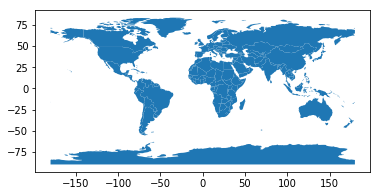

In [2]:
data = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
data.plot()
data.head()

In [3]:
# apply topolgy where vertices are snapped to a grid before applying topology (quantization)
tj_data = topojson.topology(data, snap_vertices=True, gridsize_to_snap=1e6)

In [4]:
# write computed topology to file
tj_path = '../tests/files_topojson/naturalearth_lowres.topojson'
with open(tj_path, 'w') as fp:
    json.dump(tj_data, fp)

In [5]:
# compare file sizes of the geojson and topjson file
gj_path = '../tests/files_geojson/naturalearth_lowres.geojson'
tj_kb = os.path.getsize(tj_path)/1000
gj_kb = os.path.getsize(gj_path)/1000
print('topojson naturalearth_loweres: {}kb\ngeojson naturalearth_loweres: {}kb'.format(tj_kb, gj_kb))

topojson naturalearth_loweres: 174.169kb
geojson naturalearth_loweres: 476.423kb


,id,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21068121068132 35.65008900834901,..."
1,1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32655632655641 -5.87753264903265...
2,2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59040059040069 41.8554775794176, ..."
3,3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57959157959169 24.24541275553275,..."
4,4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50008550008543 -55.199918341748...


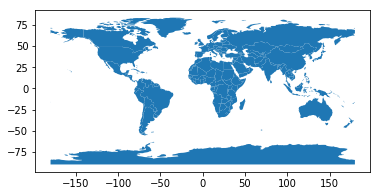

In [6]:
# read the saved topojson file into geopandas and see that it works!
data_tj = geopandas.read_file(tj_path)
data_tj.plot()
data_tj.head()

In [7]:
# for gdf_row in data_tj.iterrows():
#     print(gdf_row[1]['name'])
#     g1_svg = gdf_row[1].geometry._repr_svg_() 
#     display(SVG(g1_svg))

In [8]:
%%prun -l 10
# present timing of applying the whole topology
tj_data = topojson.topology(data, snap_vertices=True, gridsize_to_snap=1e6)

         3609507 function calls (3604845 primitive calls) in 3.190 seconds

   Ordered by: internal time
   List reduced from 562 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   108199    0.593    0.000    0.970    0.000 topology.py:44(__call__)
    22486    0.543    0.000    0.756    0.000 coords.py:143(xy)
      502    0.240    0.000    0.248    0.000 ops.py:306(shared_paths)
   121247    0.118    0.000    0.118    0.000 base.py:67(geometry_type_name)
   270639    0.104    0.000    0.373    0.000 topology.py:16(_validate)
    37729    0.091    0.000    0.119    0.000 predicates.py:23(__call__)
   755157    0.089    0.000    0.089    0.000 base.py:253(_geom)
     1302    0.080    0.000    0.100    0.000 index.py:413(intersection)
   108199    0.077    0.000    1.064    0.000 base.py:434(distance)
    48439    0.068    0.000    0.074    0.000 coords.py:44(_update)

In [ ]:
%%prun -l 10
# present timing split out in the different subtasks
ex = topojson.extract(data)
jo = topojson.join(ex, quant_factor=1e4)
cu = topojson.cut(jo)
de = topojson.dedup(cu)
ha = topojson.hashmap(de)